In [1]:
import numpy as np 
import pandas as pd
import allel
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import malariagen_data
%matplotlib inline
import sys
# adding Folder_2 to the system path
sys.path.insert(0, '/home/sanj/projects/gaardian/workflow/scripts/')
import probetools as probe

### Coeae1f region expression data

In [60]:
import locusPocus

In [61]:
clusters_df = locusPocus.clusters_df

tohex = np.vectorize(matplotlib.colors.to_hex)

clusters_df['colour'] = tohex(clusters_df['palette'])

In [72]:
clusters_df.to_csv("../../results/haplotype_clusters_metadata_r.tsv", sep="\t", index=False)

In [2]:
ag3 = malariagen_data.Ag3()
geneset = ag3.geneset()

In [3]:
contig = '2L'
start = 28_520_000
end = 28_573_000

In [4]:
geneset = geneset.query("contig == @contig & type == 'gene'")
geneset = geneset.query("start > @start & end < @end")
ids = geneset['ID'].to_numpy()

In [82]:
expr_df = pd.read_csv("../../../IR/GenX/fold_changes_gene_level_addedpops.csv")
expr_df = expr_df.query("ID in @ids")
expr_meta = pd.read_csv("../../../IR/GenX/GenX_metadata.csv")

In [83]:
fcs = pd.read_csv("../../../IR/rna-seq-meta/results/fc_data.tsv", sep="\t").drop(columns=['GeneName', 'GeneDescription'])
fcs = fcs.rename(columns={'GeneID':'ID'})
fcs.columns = [c.replace("_log2FoldChange", "") for c in fcs.columns]
fcs.set_index("ID", inplace=True)
fcs = fcs.applymap(lambda x: 2**x).reset_index()

In [84]:
expr_df = expr_df.merge(fcs)

In [85]:
expr_df = expr_df.set_index("ID").T

In [86]:
expr_df.head(4)

ID,AGAP006222,AGAP006223,AGAP006224,AGAP006225,AGAP006226,AGAP006227,AGAP006228,AGAP006229,AGAP006231,AGAP006232,AGAP006233,AGAP006234,AGAP006235
NkolondomFC,1.758962,1.257096,0.782722,2.092891,1.080462,1.552031,1.274150,1.195266,0.595759,0.754658,0.680608,1.055909,1.799033
GarreFC,8.455730,1.156028,0.532263,1.994847,10.552662,1.306920,1.839247,0.758337,0.924692,1.036455,0.685231,0.726937,1.009529
MessaFC,9.036137,1.568524,0.651073,0.943260,10.114334,0.742083,1.573451,0.741564,1.344666,1.449919,0.949278,0.960760,0.880228
BiokoFC,2.789475,0.737454,0.484026,0.722956,9.073069,0.977953,1.635437,0.900992,0.829840,1.237124,0.996609,1.176286,1.120933


In [87]:
rna_meta = pd.read_csv("../../../IR/rna-seq-meta/config/ALLcoldata.txt", sep="\t")

sp = []
for c in fcs.columns[1:]:
    
    condition = c.split("_v_")[0]
    sp.append(rna_meta.query(f"condition == '{condition}'")['species'].unique()[0])

In [88]:
expr_meta = expr_meta.applymap(lambda x: x.replace('Anopheles ', "").replace("coluzzi", 'coluzzii'))
spp = expr_meta['Species'].to_list() + sp

In [89]:
expr_df.loc[:, 'species'] = spp

In [157]:
expr_df.to_csv("/home/sanj/projects/coeae1f/results/expression/expr_data.tsv", sep="\t")

In [ ]:
expr_Df

In [100]:
spp = np.array(spp)

In [113]:
expr_df.query("species == 'arabiensis'").drop(columns='species').apply(np.mean, axis=0)

ID
AGAP006222    3.218224
AGAP006223    2.348403
AGAP006224    1.329213
AGAP006225    1.233804
AGAP006226    1.290777
AGAP006227    1.393914
AGAP006228    1.158360
AGAP006229    1.027056
AGAP006231    1.154293
AGAP006232    0.999383
AGAP006233    0.919039
AGAP006234    0.878594
AGAP006235    0.952259
dtype: float64

In [112]:
expr_df.query("species == 'coluzzii'").drop(columns='species').apply(np.mean, axis=0)

ID
AGAP006222    3.485790
AGAP006223    1.175761
AGAP006224    0.885333
AGAP006225    1.503992
AGAP006226    3.990667
AGAP006227    1.712814
AGAP006228    1.338475
AGAP006229    0.899595
AGAP006231    1.096229
AGAP006232    0.994813
AGAP006233    0.843945
AGAP006234    0.832778
AGAP006235    0.803232
dtype: float64

In [111]:
expr_df.query("species == 'gambiae'").drop(columns='species').apply(np.mean, axis=0)

ID
AGAP006222    3.831943
AGAP006223    2.481638
AGAP006224    1.096435
AGAP006225    1.841615
AGAP006226    1.253968
AGAP006227    2.715766
AGAP006228    1.512400
AGAP006229    1.007248
AGAP006231    0.829522
AGAP006232    0.932862
AGAP006233    0.777295
AGAP006234    0.968602
AGAP006235    1.054732
dtype: float64

In [93]:
expr_df = expr_df.set_index("ID")

KeyError: "None of ['ID'] are in the columns"

In [92]:
expr_df.

['gambiae',
 'coluzzii',
 'coluzzii',
 'coluzzii',
 'gambiae',
 'coluzzii',
 'coluzzii',
 'coluzzii',
 'arabiensis',
 'arabiensis',
 'arabiensis',
 'arabiensis',
 'coluzzii',
 'coluzzii',
 'gambiae',
 'gambiae',
 'arabiensis',
 'arabiensis',
 'arabiensis',
 'coluzzii',
 'coluzzii',
 'coluzzii',
 'coluzzii',
 'coluzzii',
 'coluzzii',
 'coluzzii',
 'coluzzii',
 'gambiae',
 'arabiensis',
 'arabiensis',
 'arabiensis',
 'gambiae',
 'coluzzii',
 'coluzzii',
 'arabiensis',
 'gambiae',
 'arabiensis',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'gambiae',
 'funestus',
 'funestus',
 'funestus',
 'funestus',
 'funestus',
 'arabiensis',
 'arabiensis',
 'arabiensis',
 'arabiensis']

In [90]:
rna_meta.eval("species == 'gambiae'")

,colData,condition,resistance,species,condition2,batch,condition3
0,Tie1,Tiefora,resistant,gambiae,Tiefora,1,Tiefora
1,Tie2,Tiefora,resistant,gambiae,Tiefora,1,Tiefora
2,Tie3,Tiefora,resistant,gambiae,Tiefora,1,Tiefora
3,Gou1,Gou,resistant,arabiensis,Gou,1,Gou
4,Gou2,Gou,resistant,arabiensis,Gou,1,Gou
...,...,...,...,...,...,...,...
167,Dongola2,Dongola,susceptible,arabiensis,susceptible,9,sus_ara
168,Dongola3,Dongola,susceptible,arabiensis,susceptible,9,sus_ara
169,Ethiopia1,Ethiopia,resistant,arabiensis,Ethiopia,9,Ethiopia
170,Ethiopia2,Ethiopia,resistant,arabiensis,Ethiopia,9,Ethiopia


In [77]:
expr_df

,ID,NkolondomFC,GarreFC,MessaFC,BiokoFC,KitweFC,BouakeFC,MBeFC,TiassaleFC,PembaMozFC,...,KovieOkyeroFC,KovieMalanvilleFC,YouandeFC,HaiFC,MuhezaFC,DarFC,Bouake_gamFC,Bouake_colFC,Teifora_colFC,Gaura_araFC
5604,AGAP006222,1.758962,8.455730,9.036137,2.789475,1.044187,2.688355,2.958349,3.324126,1.105328,...,0.923923,0.994449,2.979269,2.035060,1.067554,3.628833,0.873212,1.111831,1.650114,2.390850
5605,AGAP006223,1.257096,1.156028,1.568524,0.737454,1.257551,1.102810,1.037304,1.513508,1.023836,...,1.036449,1.060978,1.356623,0.992244,1.023846,1.021181,0.143247,1.013000,0.126969,2.438666
5606,AGAP006224,0.782722,0.532263,0.651073,0.484026,0.824016,0.581647,0.556146,0.997366,1.023786,...,1.371020,1.133517,0.696008,1.061241,1.031165,1.693503,0.767294,1.369033,0.479899,2.100843
5607,AGAP006225,2.092891,1.994847,0.943260,0.722956,1.669444,1.461626,1.187281,2.041694,0.373488,...,2.447890,1.372639,2.243376,1.906102,0.748296,2.197175,1.173321,0.988603,1.170565,1.194355
5608,AGAP006226,1.080462,10.552662,10.114334,9.073069,1.407708,1.309985,1.527137,2.070221,0.954209,...,0.812287,0.965528,1.309410,2.089036,0.932144,1.452161,1.142520,0.852183,0.799988,1.300362
5609,AGAP006227,1.552031,1.306920,0.742083,0.977953,1.762764,5.095512,9.112599,1.122230,1.063441,...,1.614511,1.169685,1.377856,5.084121,1.052112,1.327703,5.266557,0.960142,0.715362,1.007962
5610,AGAP006228,1.274150,1.839247,1.573451,1.635437,1.208453,1.375442,1.637503,1.704146,1.110098,...,1.320809,1.141604,1.115736,1.648120,0.854571,1.701340,0.916401,1.069708,0.724747,0.909935
5611,AGAP006229,1.195266,0.758337,0.741564,0.900992,1.142710,0.752848,0.780872,0.862910,1.385064,...,1.013902,0.697093,1.004525,0.969431,0.982737,0.960306,0.888770,1.119194,0.735033,0.727895
5612,AGAP006231,0.595759,0.924692,1.344666,0.829840,0.493308,1.138283,1.173123,1.035196,1.042739,...,1.229046,1.416474,0.678050,2.073557,1.137586,1.143091,0.972110,1.001874,0.739763,1.075073
5613,AGAP006232,0.754658,1.036455,1.449919,1.237124,0.813343,0.918194,0.890844,0.898977,0.997600,...,0.972776,1.189738,0.984470,0.929621,1.190289,1.221346,0.953103,0.998376,0.733827,1.010724


In [ ]:
expr_df.set_index("ID").apply(np.median, axis=1)

### plotting the normalised read count data

In [16]:
import seaborn as sns

In [53]:
counts_df = pd.read_csv("../../../IR/rna-seq-meta/counts.tsv", sep="\t")
#metadata = pd.read_csv("../../../IR/rna-seq-meta/ALLcoldata.txt", sep="\t")

counts_df = counts_df.query("GeneID in @ids")

counts_df = counts_df.melt(id_vars='GeneID', var_name='Sample', value_name='Count')
#counts_df.loc[:, 'Count'] = np.log2(counts_df.loc[:, 'Count']+1)

In [54]:
counts_df = counts_df.groupby(['GeneID', 'Sample']).agg({'Count':'mean'}).reset_index()

In [59]:
counts_df.groupby("GeneID").agg({'Count':'median'})

,Count
GeneID,
AGAP006222,238.5
AGAP006223,154.0
AGAP006224,231.5
AGAP006225,1175.0
AGAP006226,328.0
AGAP006227,227.0
AGAP006228,485.5
AGAP006229,255.5
AGAP006231,253.0


[Text(0, 0, 'AGAP006222'),
 Text(1, 0, 'AGAP006223'),
 Text(2, 0, 'AGAP006224'),
 Text(3, 0, 'AGAP006225'),
 Text(4, 0, 'AGAP006226'),
 Text(5, 0, 'AGAP006227'),
 Text(6, 0, 'AGAP006228'),
 Text(7, 0, 'AGAP006229'),
 Text(8, 0, 'AGAP006231'),
 Text(9, 0, 'AGAP006232'),
 Text(10, 0, 'AGAP006233'),
 Text(11, 0, 'AGAP006234'),
 Text(12, 0, 'AGAP006235')]

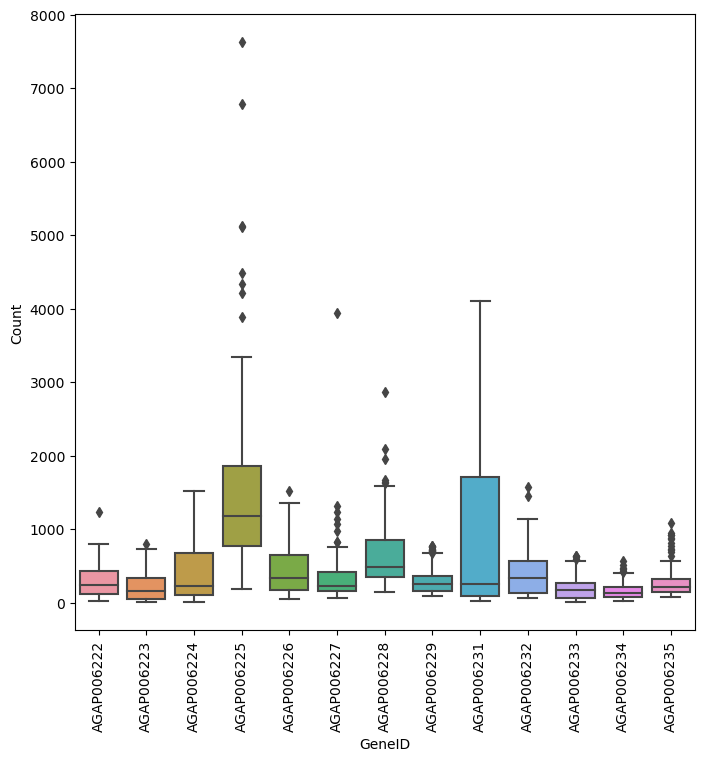

In [55]:
fig, ax = plt.subplots(1,1, figsize=[8,8])
sns.boxplot(data=counts_df, x='GeneID', y='Count', ax=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)